# Segmenting vocalisations

> 'Vocalisation' is a common but slightly vague term. In this guide, I use it to
> refer to a single song or call, while 'unit' refers to a single note or
> syllable.

## Segmenting vocalisations into units

Following the example in the previous section, we can first create a project
structure:

In [1]:
from pathlib import Path
import pkg_resources
from pykanto.utils.paths import ProjDirs, get_file_paths, get_wavs_w_annotation
from pykanto.dataset import KantoData
from pykanto.parameters import Parameters

In [2]:
# Prepare a project:
DATASET_ID = "BENGALESE_FINCH"
DATA_PATH = Path(pkg_resources.resource_filename("pykanto", "data")) 
PROJECT_ROOT = Path(DATA_PATH).parent
RAW_DATA = DATA_PATH / "raw" / DATASET_ID
DIRS = ProjDirs(PROJECT_ROOT, RAW_DATA, DATASET_ID, mkdir=True)

Then, we can set audio parameters and load the audio files into a `KantoData`
object:

In [3]:
params = Parameters(
    sr=32000,
    window_length=512,
    hop_length=128,
    fft_size=2048,
    top_dB=120,
    num_mel_bins=224,
    lowcut=500,
    highcut=11000,
    dereverb=False,
    silence_threshold=0.1,
)

dataset = KantoData(
    DIRS,
    parameters=params,
    overwrite_dataset=True,
    overwrite_data=True,
)

Loading JSON files:   0%|          | 0/2 [00:00<?, ?it/s]

2023-01-17 13:58:25,312	INFO worker.py:1519 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8266 


Preparing spectrograms:   0%|          | 0/2 [00:00<?, ?it/s]

Done


You can check any vocalisation in the newly created dataset by using the plot
method:

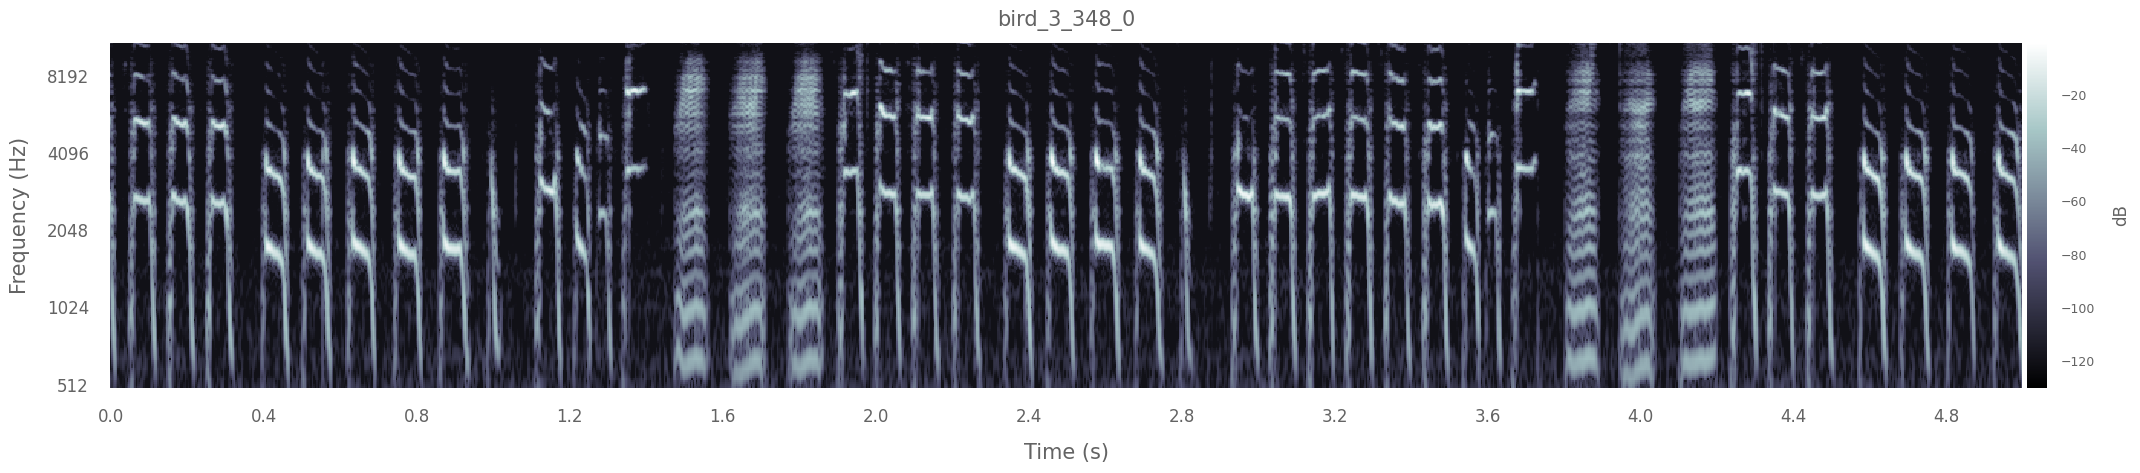

In [4]:
# Plot the first vocalisation in the dataset
key = dataset.data.index[0]
dataset.plot(key, max_lenght =5)

Finally, to segment the vocalisations into units, we do the following:

In [5]:
dataset.segment_into_units()

Finding units in vocalisations:   0%|          | 0/2 [00:00<?, ?it/s]

Found and segmented 268 units.


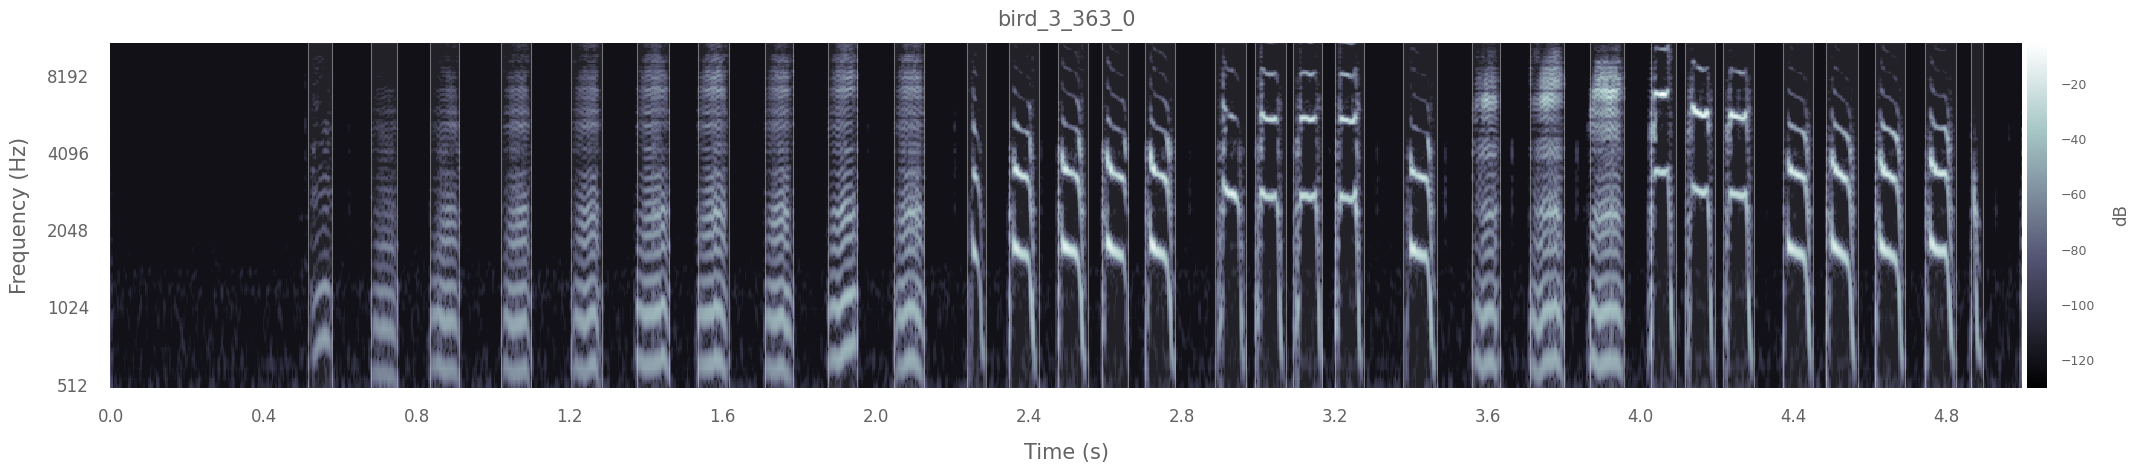

In [7]:
# Plot another vocalisation in the dataset, now segmented:
key = dataset.data.index[1]
dataset.plot(key, segmented=True, max_lenght =5)

If you want to access the onsets or offsets manually, simply get them from the dataset:

In [20]:

print(f"First 10 note onset times: \n{dataset.data.loc[key, 'onsets'][:10]}")


First 10 note onset times: 
[0.516 0.68  0.836 1.02  1.204 1.376 1.536 1.712 1.876 2.048]


```{admonition} Note: 
:class: note

This method works reasonably well, especially after some fine-tuning of the parameters (see {py:class}`~pykanto.parameters.Parameters`). However, it will necessarily fail in difficult cases, for example if the SNR is very bad of there is a lot of amplitude modulation within notes. In such cases you might have to resort to manual segmentation, using a tool such as [sonic visualiser](https://www.sonicvisualiser.org/), or train a model to work with your specific species and recording conditions. Here is a very good option if you want to do the latter:

TweetyNet: a single neural network model that learns how to segment spectrograms of birdsong into annotated syllables.
[elifesciences.org/articles/63853](https://elifesciences.org/articles/63853)
```
